### Import modules

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1) Reading the noisy image

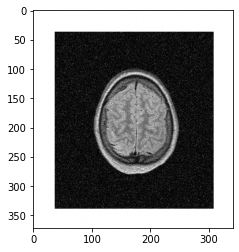

In [24]:
noisy_image = cv2.imread('MRI_noisy.png', 0)
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)

### 2) Cropping a bright region

The image is expected to have a border of pixels with 250 intensity. Lets see how is the distribution of the pixel intensities in a bright region.

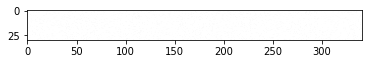

In [25]:
bright_region = noisy_image[:30, :]
plt.imshow(bright_region, cmap='gray', vmin=0, vmax=255)

Now lets crop the image to a region with a bright star.

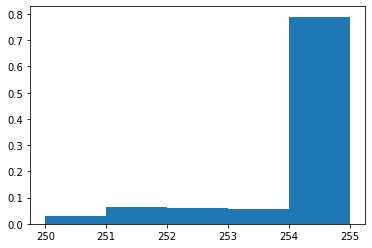

In [30]:
plt.hist(bright_region.ravel(), density = True, bins=[i for i in range(bright_region.min(), bright_region.max() + 1)]);

We see that the most frequent pixel intensity is 255 by far. This shows that **the most noise values are bigger than 5**.

Also, we can see that **the noise sign is always positive because we don't have values below 250.**

### 3) Cropping a dark region

Now we can crop a dark region to see the distribution of the pixel intensities.

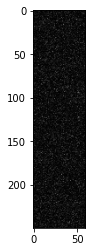

In [27]:
dark_region = noisy_image[50:300, 40:100]
plt.imshow(dark_region, cmap='gray', vmin=0, vmax=255)

Now we plot the histogram of the pixel intensities in the dark region.

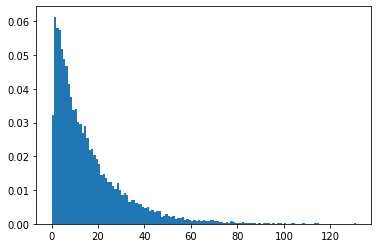

In [32]:
plt.hist(dark_region.ravel(), density = True, bins=[i for i in range(dark_region.min(), dark_region.max() + 1)]);

So the noise seems to be an **erlang(gamma) distribution** because it has a **positive sign** and **the most frequent value is not 0**. The probability density function goes up in a short time and then it goes down.

### 4) Reading the dental image

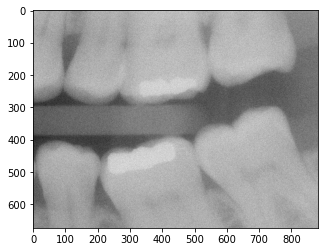

In [34]:
dental_image = cv2.imread('DentalXray_Noisy.png', 0)
plt.imshow(dental_image, cmap='gray', vmin=0, vmax=255)

We want to perform adaptive noise reduction filtering on the dental image. We can implement a function to take the image and the window size as input and return the filtered image.

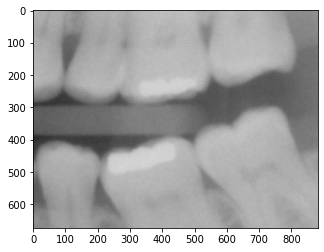

In [41]:
def adaptive_noise_reduction(image, kernel_size):
    # pad the image with mirror padding
    padded_image = np.pad(image, kernel_size // 2, mode='symmetric')
    # calculating the local mean and variance
    local_mean_matrix = np.zeros(image.shape)
    local_variance_matrix = np.zeros(image.shape)
    # looping through the image and calculating the local mean and variance
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # extracting the kernel from the padded image
            window = padded_image[i:i + kernel_size, j:j + kernel_size]
            # calculating the local mean and variance
            local_variance_matrix[i, j] = window.var()
            local_mean_matrix[i, j] = window.mean()
    # calculating the global variance
    variance = local_variance_matrix.mean()
    # set local variance to global variance if it is less than global variance
    local_variance_matrix[local_variance_matrix < variance] = variance
    # creating a new image with the same size as the original image
    new_image = local_mean_matrix - (variance / local_variance_matrix) * (image - local_mean_matrix)
    return new_image

new_image = adaptive_noise_reduction(dental_image, 7)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=255);
            

### 7) Average filter

Now we can apply a 7*7 average filter to the dental image:

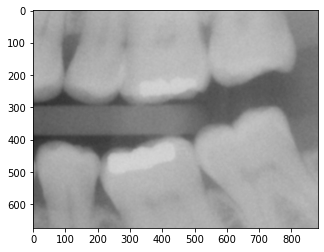

In [39]:
averaged_image = cv2.blur(dental_image, (7, 7))
plt.imshow(averaged_image, cmap='gray', vmin=0, vmax=255);

### 8) Comparison

Now we can plot the results to compare the images:

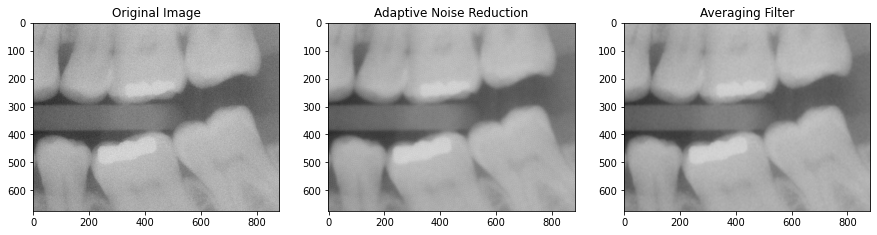

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(dental_image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(new_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Adaptive Noise Reduction')
ax[2].imshow(averaged_image, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Averaging Filter')
plt.show();

In the adaptive noise reduction formula if the noises of all windows are equal, then the filtered image will be the same as the average filter. But in our case, the noises are not equal. So the filtered image is different from the average filter.

In this case, we have some parts in our image that have a lot of noise and some parts that have less noise. The adaptive filter, sets the variance of the windows with less noise to global variance and the other windows variance will remain the same. So the filtered image will be less blurred in the parts with less noise and more blurred in the parts with more noise. So, the details of the image will be more preserved than the average filter.